In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qwertyu/L_james.jfif
/kaggle/input/forbes-highest-paid-athletes-19902019/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/forbes-highest-paid-athletes-19902019/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv");

In [3]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [4]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [5]:
df.shape

(301, 8)

In [6]:
df1=df.dropna()

In [7]:
df1.shape

(277, 8)

In [8]:
import numpy as np
df.groupby("Nationality").count()

,S.NO,Name,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
Nationality,,,,,,,
Argentina,9,9,9,9,9,9,9
Australia,1,1,1,0,1,1,1
Austria,1,1,1,1,1,1,1
Brazil,9,9,9,8,9,9,9
Canada,6,6,6,6,6,6,6
Dominican,1,1,1,1,1,1,1
Filipino,1,1,1,1,1,1,1
Finland,3,3,3,3,3,3,3
France,3,3,3,2,3,3,3


Text(0.5, 1.0, 'No of Athlete from each Country')

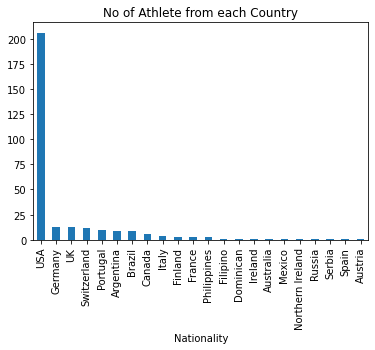

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df.groupby("Nationality")["S.NO"].count().sort_values(ascending=False).plot(kind='bar')
plt.title("No of Athlete from each Country")

# CLEARLY THE NUMBER OF USA ATHLETES IN HIGHEST PAID ATHLETES ARE VERY LARGE

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [11]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


Text(0.5, 1.0, 'Total Earning as per Country')

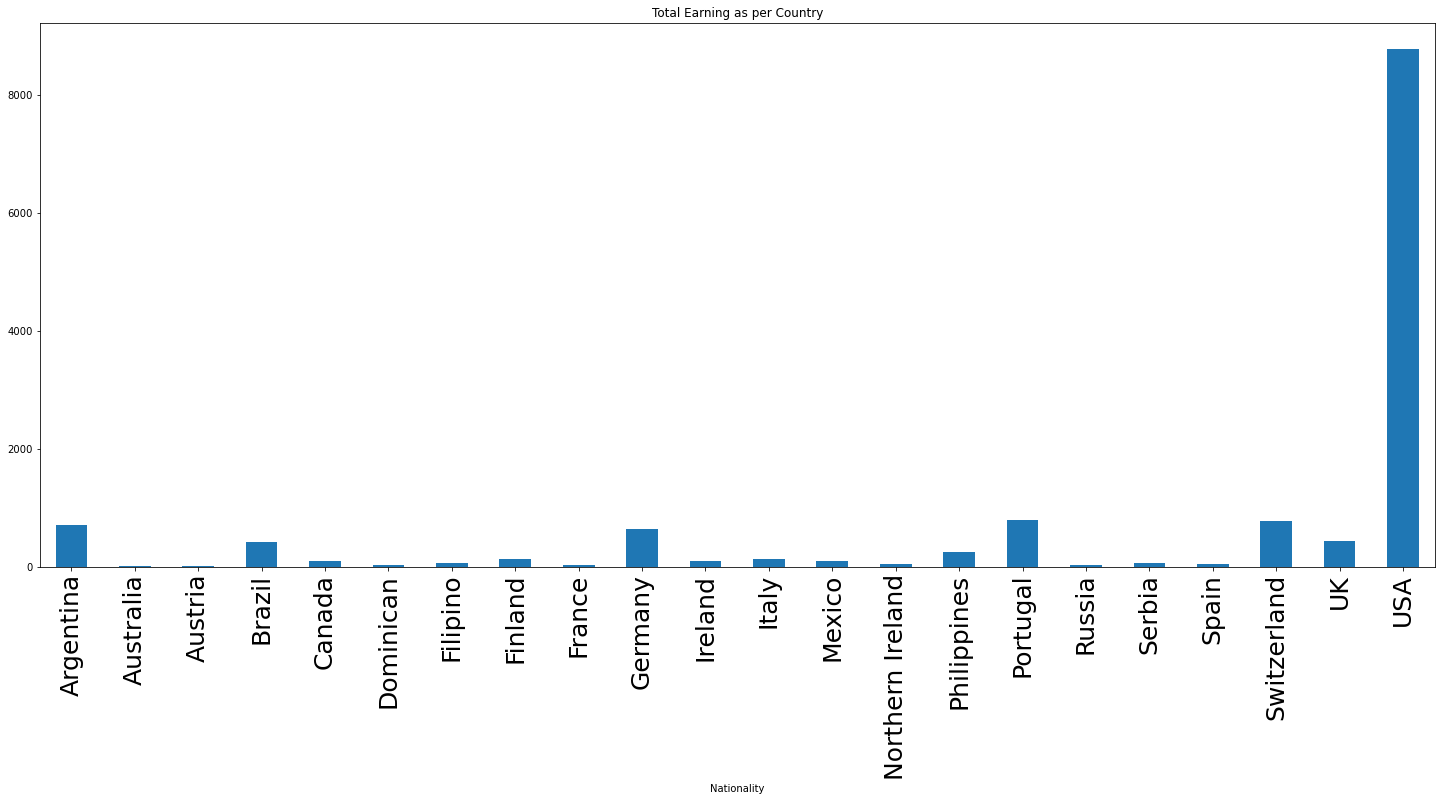

In [12]:
plt.figure(figsize=(25,10))
df.groupby("Nationality")["earnings ($ million)"].sum().plot(kind="bar")
plt.xticks(fontsize = 25)
plt.title("Total Earning as per Country")

# WE WILL REMOVE USA FROM THE TABLE AND WILL TREAT IT DIFFERENTLY


In [13]:

df2=df[df["Nationality"]!="USA"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Switzerland'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'Argentina'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Finland'),
  Text(9, 0, 'France'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'Dominican'),
  Text(12, 0, 'Filipino'),
  Text(13, 0, 'Australia'),
  Text(14, 0, 'Mexico'),
  Text(15, 0, 'Northern Ireland'),
  Text(16, 0, 'Russia'),
  Text(17, 0, 'Serbia'),
  Text(18, 0, 'Spain'),
  Text(19, 0, 'Austria'),
  Text(20, 0, 'Ireland')])

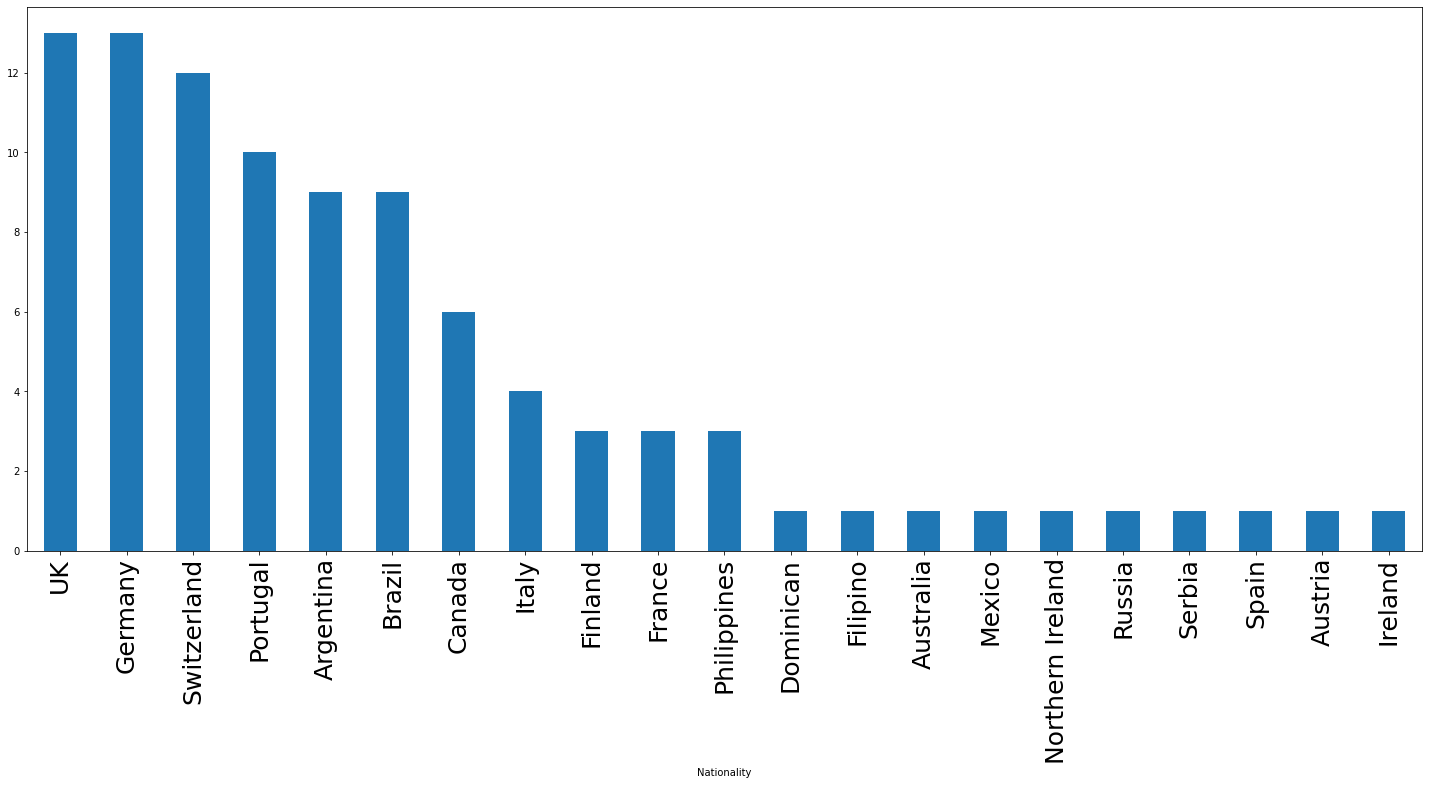

In [14]:
plt.figure(figsize=(25,10))
df2.groupby("Nationality")["S.NO"].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(fontsize = 25)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Russia'),
  Text(3, 0, 'Dominican'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Spain'),
  Text(6, 0, 'Northern Ireland'),
  Text(7, 0, 'Serbia'),
  Text(8, 0, 'Filipino'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Ireland'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Italy'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Philippines'),
  Text(15, 0, 'Brazil'),
  Text(16, 0, 'UK'),
  Text(17, 0, 'Germany'),
  Text(18, 0, 'Argentina'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'Portugal')])

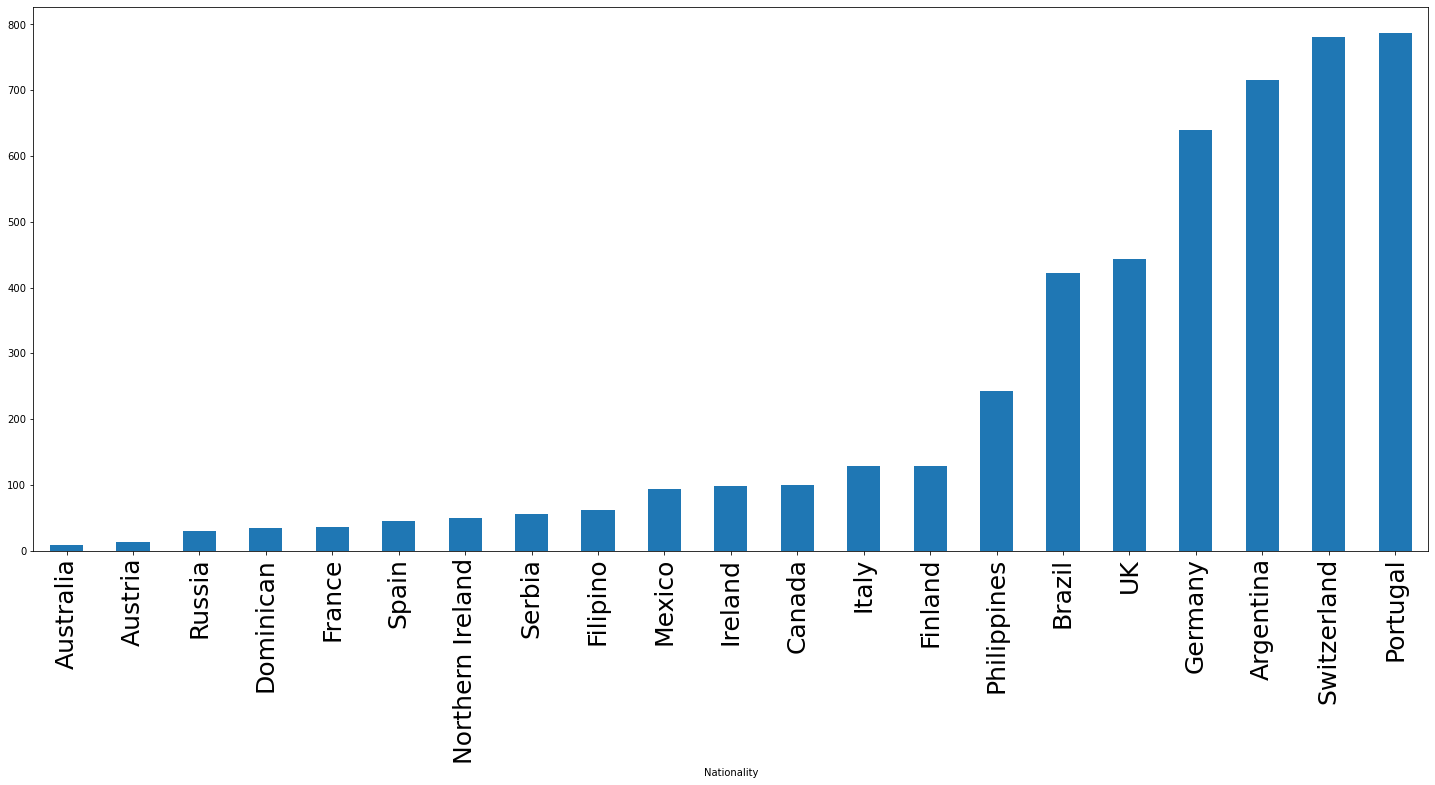

In [15]:
plt.figure(figsize=(25,10))
df2.groupby("Nationality")["earnings ($ million)"].sum().sort_values().plot(kind="bar")
plt.xticks(fontsize = 25)

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

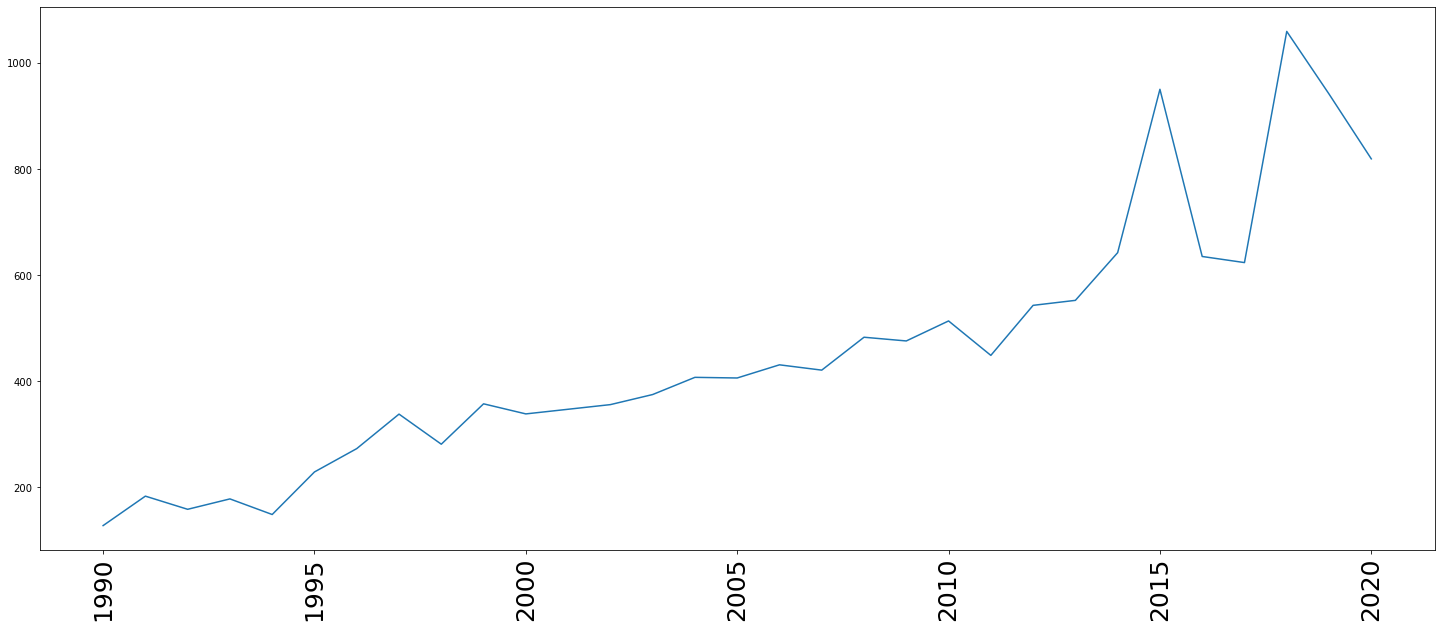

In [16]:
#The increase in the earnings with the time
plt.figure(figsize=(25,10))
plt.plot(df.groupby("Year")["earnings ($ million)"].sum())
plt.xticks(fontsize = 25)
plt.xticks(rotation=90)

In [17]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'ice hockey'),
  Text(1, 0, 'NBA'),
  Text(2, 0, 'Hockey'),
  Text(3, 0, 'Auto racing'),
  Text(4, 0, 'American Football / Baseball'),
  Text(5, 0, 'cycling'),
  Text(6, 0, 'NFL'),
  Text(7, 0, 'Ice Hockey'),
  Text(8, 0, 'Auto Racing (Nascar)'),
  Text(9, 0, 'Baseball'),
  Text(10, 0, 'NASCAR'),
  Text(11, 0, 'baseball'),
  Text(12, 0, 'MMA'),
  Text(13, 0, 'auto racing'),
  Text(14, 0, 'motorcycle gp'),
  Text(15, 0, 'tennis'),
  Text(16, 0, 'F1 Motorsports'),
  Text(17, 0, 'Auto Racing'),
  Text(18, 0, 'F1 racing'),
  Text(19, 0, 'soccer'),
  Text(20, 0, 'boxing'),
  Text(21, 0, 'Tennis'),
  Text(22, 0, 'American Football'),
  Text(23, 0, 'basketball'),
  Text(24, 0, 'Golf'),
  Text(25, 0, 'golf'),
  Text(26, 0, 'Boxing'),
  Text(27, 0, 'Soccer'),
  Text(28, 0, 'Basketball')])

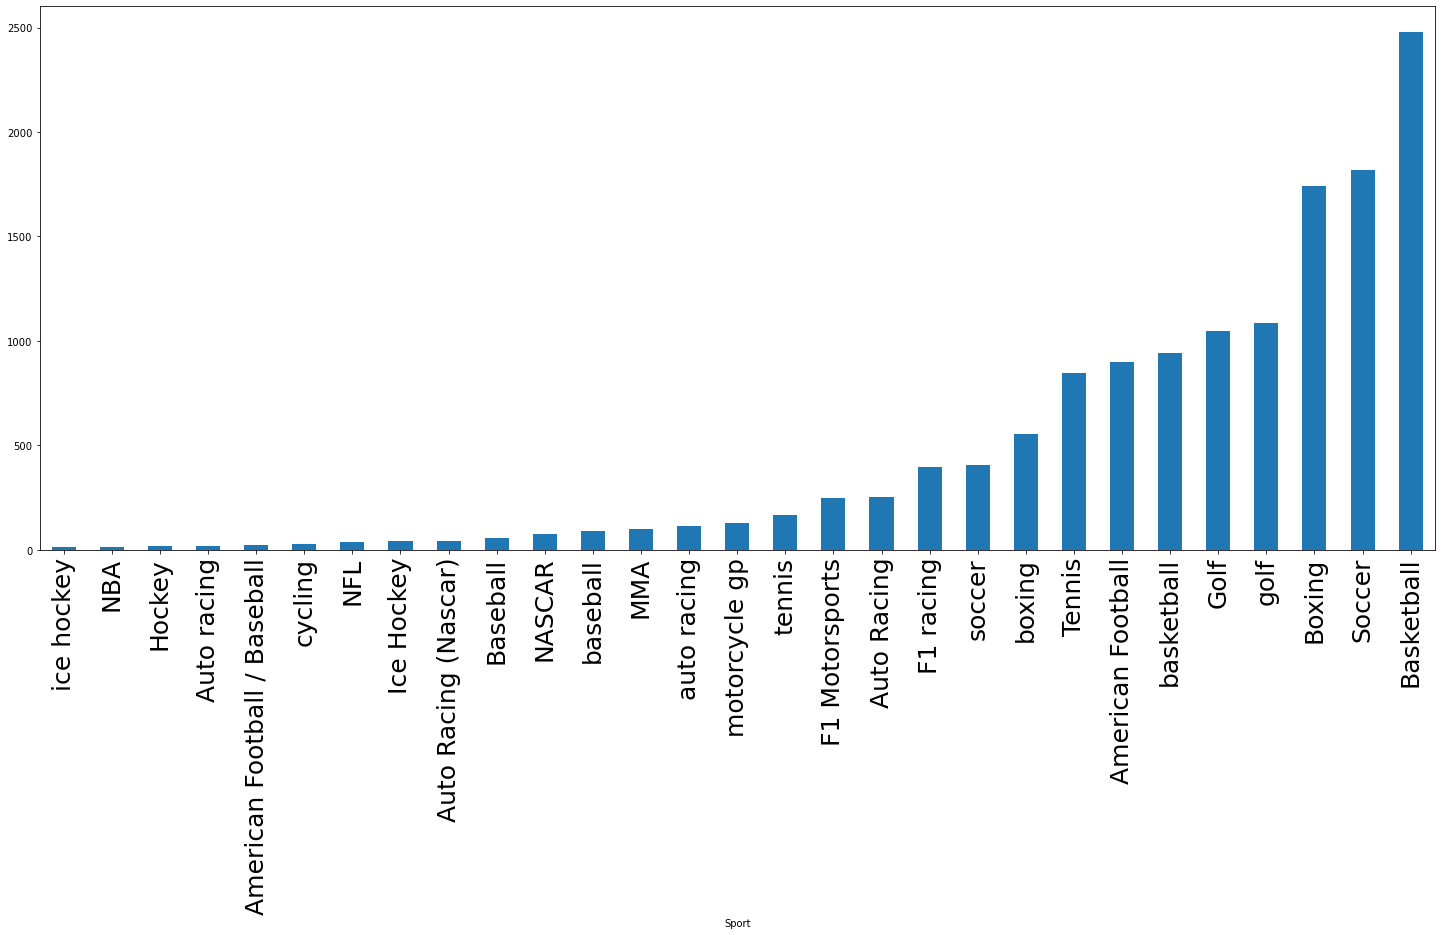

In [18]:
# Highest paying sports
plt.figure(figsize=(25,10))
df.groupby("Sport")["earnings ($ million)"].sum().sort_values().plot(kind="bar")
plt.xticks(fontsize = 25)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tiger Woods'),
  Text(1, 0, 'LeBron James'),
  Text(2, 0, 'Floyd Mayweather'),
  Text(3, 0, 'Cristiano Ronaldo'),
  Text(4, 0, 'Roger Federer'),
  Text(5, 0, 'Michael Jordan'),
  Text(6, 0, 'Lionel Messi'),
  Text(7, 0, 'Michael Schumacher'),
  Text(8, 0, 'Kobe Bryant'),
  Text(9, 0, 'Phil Mickelson')])

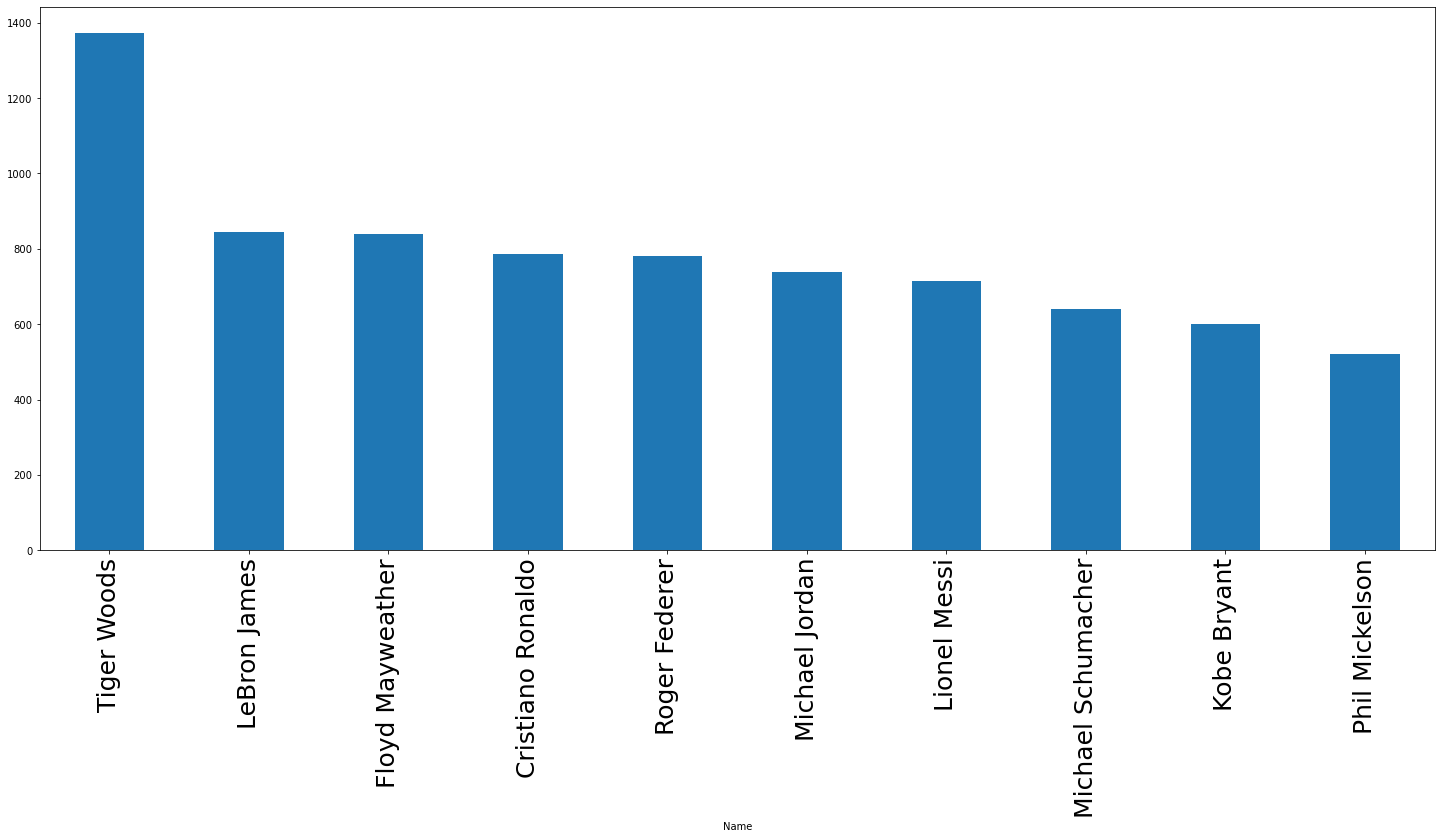

In [19]:
# 10 highest earning Athletes
plt.figure(figsize=(25,10))
df.groupby("Name")["earnings ($ million)"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.xticks(fontsize = 25)
plt.xticks(rotation=90)


<AxesSubplot:title={'center':'Number of athletes in each sport listed in Forbes (1990-2020)'}, xlabel='Sport'>

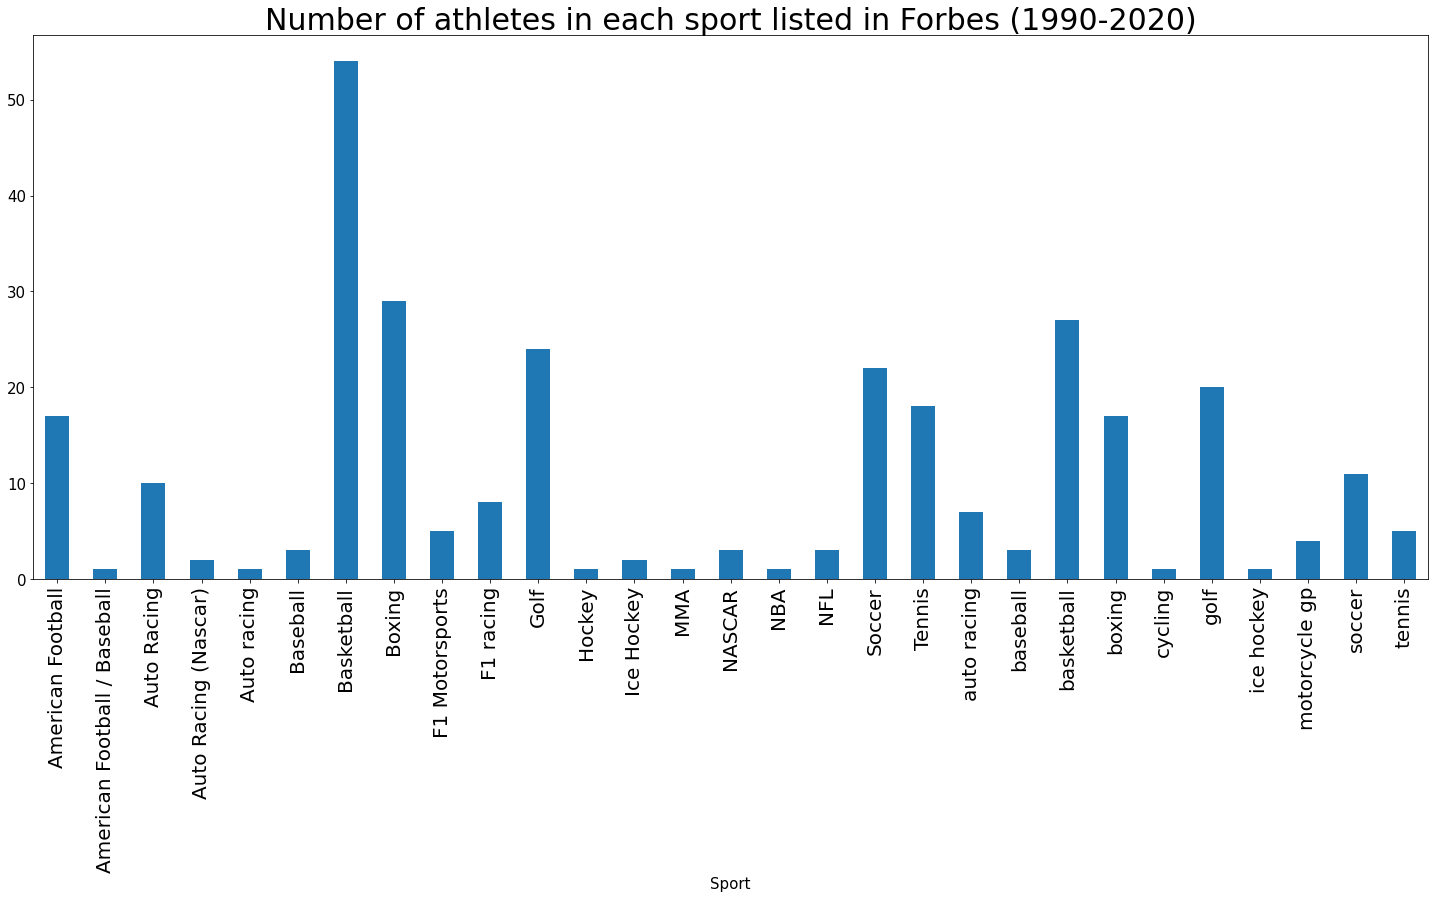

In [20]:
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = 15
plt.title('Number of athletes in each sport listed in Forbes (1990-2020)',fontsize=30)
plt.xticks(fontsize = 20)
df.groupby("Sport")["S.NO"].count().plot(kind="bar")

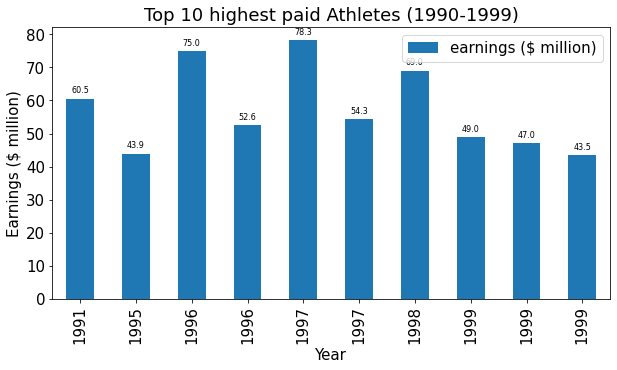

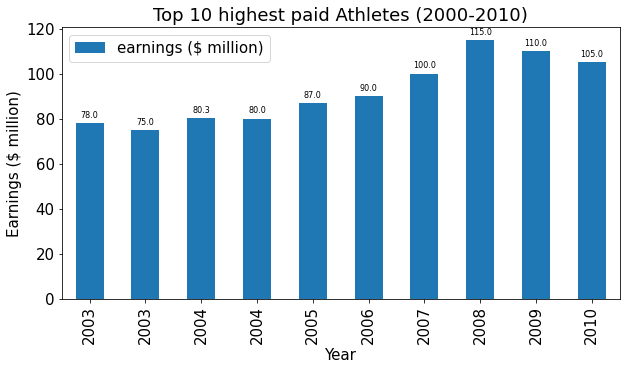

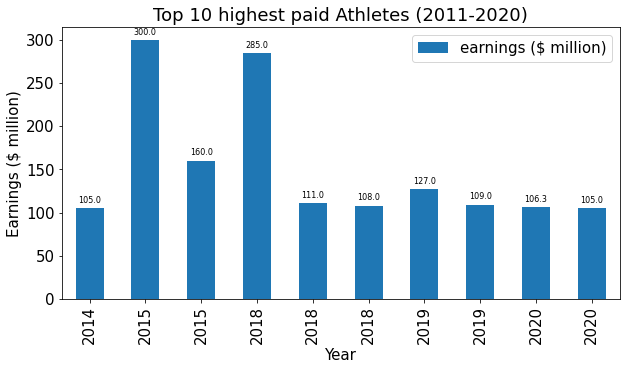

In [21]:
decade1=df[df.Year.isin(np.arange(1990,2000,1))]
decade2=df[df.Year.isin(np.arange(2000,2011,1))]
decade3=df[df.Year.isin(np.arange(2011,2021,1))]

decade1=(decade1.sort_values('earnings ($ million)',ascending=False).head(10)).sort_values('Year')
decade2=(decade2.sort_values('earnings ($ million)',ascending=False).head(10)).sort_values('Year')
decade3=(decade3.sort_values('earnings ($ million)',ascending=False).head(10)).sort_values('Year')

plots1=decade1.plot.bar(x='Year',y='earnings ($ million)',figsize=(10,5))
plt.title('Top 10 highest paid Athletes (1990-1999)')
plt.ylabel('Earnings ($ million)');
for bar in plots1.patches:
    plots1.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=8,xytext = (0, 8), 
                   textcoords = 'offset points')

plots2=decade2.plot.bar(x='Year',y='earnings ($ million)',figsize=(10,5))
plt.title('Top 10 highest paid Athletes (2000-2010)')
plt.ylabel('Earnings ($ million)');
for bar in plots2.patches:
    plots2.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=8,xytext = (0, 8), 
                textcoords = 'offset points')

plots3=decade3.plot.bar(x='Year',y='earnings ($ million)',figsize=(10,5))
plt.title('Top 10 highest paid Athletes (2011-2020)')
plt.ylabel('Earnings ($ million)');
for bar in plots3.patches:
    plots3.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=8,xytext = (0, 8), 
                   textcoords = 'offset points')

In [22]:
import matplotlib.image as image
im = image.imread('/kaggle/input/qwertyu/L_james.jfif')

In [23]:
lebron_james = df[df['Name']=='LeBron James']

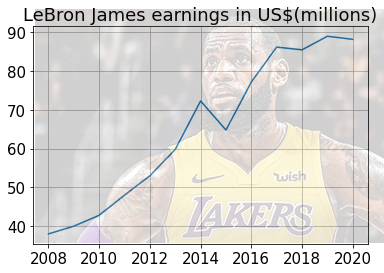

<Figure size 7200x2160 with 0 Axes>

In [24]:
fig, ax = plt.subplots()
ax.grid()
ax.plot('Year','earnings ($ million)',data=lebron_james)
ax.set_title("LeBron James earnings in US$(millions)")
plt.figure(figsize=(100,30))
fig.figimage(im, 35, 30,cmap='ocean', alpha=.2)
plt.show()

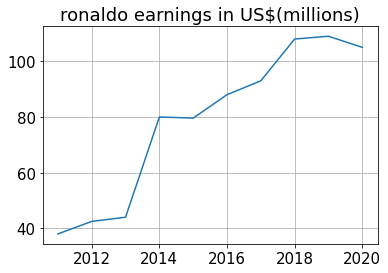

<Figure size 72x72 with 0 Axes>

In [25]:
ronaldo = df[df['Name']=='Cristiano Ronaldo']
fig, ax = plt.subplots()
ax.grid()
ax.plot('Year','earnings ($ million)',data=ronaldo)
ax.set_title("ronaldo earnings in US$(millions)")
plt.figure(figsize=(1,1))
plt.show()

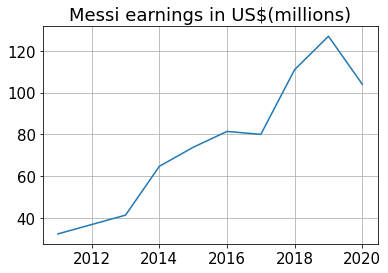

<Figure size 72x72 with 0 Axes>

In [26]:
messi = df[df['Name']=='Lionel Messi']
fig, ax = plt.subplots()
ax.grid()
ax.plot('Year','earnings ($ million)',data=messi)
ax.set_title("Messi earnings in US$(millions)")
plt.figure(figsize=(1,1))
plt.show()

Text(0.5, 1.0, 'Earnings based on Rank')

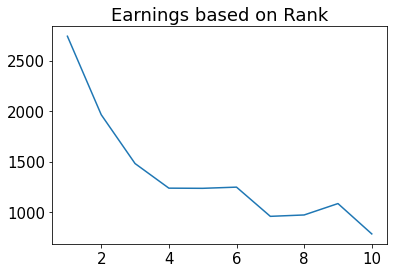

In [27]:
plt.plot(df.groupby("Current Rank")["earnings ($ million)"].sum())
plt.title("Earnings based on Rank")
# plt.plot(df1.groupby("Previous Year Rank")["earnings ($ million)"].sum())

In [28]:
df3 = df.copy()
df3.drop('S.NO',axis=1,inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [29]:
df3['Year'] = df3['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df3['year'] = pd.DatetimeIndex(df3['Year']).year  
df3.set_index('year', inplace=True)
df3.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df3['Sport'] = df3['Sport'].str.upper()
df3.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


In [30]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df3[df3['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

# z.style.set_properties(**{'background-color': 'pink',
                           # 'color': 'black',
#                             'border-color': 'white'})
z.style.background_gradient(cmap='Reds') 

,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000
